**Breast cnacer cell data set which describe features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.**

To get more understand to data we need to take alook on data source [braest cancer data source](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data)



# Columns content

**1) ID** -> patient - case id

**2) Diagnoseis** -> M (malignent) - B (benign)

**Feature for cells and nuclues from computed from a digitized image of a fine needle aspirate (FNA) of a breast mass**

   - **radius**
       - mean from center to point in perimeter
   - **texture**
      - standered division of gray scale value
   - **perimeter**
   - **area**
   - **smoothness**
      - How smooth or jagged the edges of the cell nuclei are.
        - Low smoothness: Edges are rough or irregular (potentially more dangerous, often malignant).
        - High smoothness: Edges are even and regular (more likely benign).
   - **compactness**
      - How tightly the cell shape is packed — a measure of shape density and roundness.
      - Compactness = (Perimeter² / Area) - 1.0
        - Low compactness: Tumor is round and compact — likely benign.
        - High compactness: Tumor is spread out or irregular — often malignant.
   - **concavity**
      - How deep the inward curves are on the edge of the nucleus.
        - Low concavity: Mostly smooth, rounded shapes.
        - High concavity: Irregular shapes with deep notches or indentations — often seen in malignant tumors.
   - **concave points**
      - The number of inward-curving points along the edge.
        - Low value: Few or no inward dips → smoother shape.
        - High value: More indentations or sharp corners.
   - **Symmetry**
      - How similar one side of the cell nucleus is to the other.
        - Low symmetry:Tumor shape is asymmetrical — may suggest malignancy.
        - High symmetry: Shape is more balanced and mirror-like — more likely benign.
   - **Fractal Dimension**
      - A measure of complexity or roughness of the shape's edge — like how “wiggly” or detailed it is.
        - Low value (~1.0): Simple, smooth border.'
        - High value: Very irregular, jagged edges — often linked to malignant cells.

**All these features have three measurments**
  - Mean
    - The average measurement across all cell nuclei in that tumor.
    - Gives you a general idea of what the tumor is like overall.
  -  Standard Error (se)
    - Measures how much variation or uncertainty there is in the measurements.
    - A low SE means all the nuclei are similar.
    - A high SE means the nuclei are quite different from each other.
  - Worst
    - The highest value observed for that feature among all the nuclei.
    - Captures the most extreme part of the tumor.
   

#Explore data set

1- understand data set

- import necessary linraries

In [ ]:
import pandas as pd

- read data

In [ ]:
breast_cancer_df=pd.read_csv("drive/MyDrive/Colab Notebooks/data analytics project/breast_cancer.csv")

- explore head and tail

In [ ]:
breast_cancer_df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [ ]:
breast_cancer_df.tail()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
564                  0.07115          NaN  
565                  0.06637          NaN  
566                  0.07820          NaN  
567                  0.12400          NaN  
568                  0.07039          NaN  

[5 rows x 33 columns]

- index

In [ ]:
breast_cancer_df.index

RangeIndex(start=0, stop=569, step=1)

- shape

In [ ]:
breast_cancer_df.shape

(569, 33)

- column names

In [ ]:
breast_cancer_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

- info

In [ ]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

- find nulls

In [ ]:
breast_cancer_df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: int64

#Cleaning Data

- drop unamed: 32 column cause it fill with nulls

In [ ]:
breast_cancer_df=breast_cancer_df.drop(columns=['Unnamed: 32','id'])

In [ ]:
breast_cancer_df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

- deal with categorical variable

#Visulization and Feature Extraction

- import necessary libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

- visulize diagnoses variable (target) count

Count of malignent: 212
Count of Begnin: 357



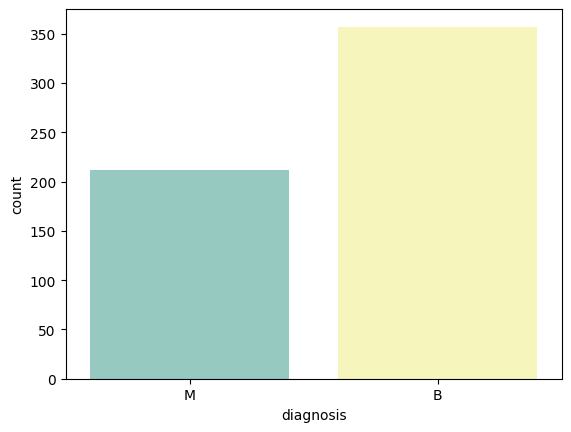

In [ ]:
sns.countplot(x='diagnosis',data=breast_cancer_df,hue='diagnosis',palette='Set3')
print(f"Count of malignent: {(breast_cancer_df['diagnosis']=='M').sum()}")
print(f"Count of Begnin: {(breast_cancer_df['diagnosis']=='B').sum()}\n")

In [ ]:
breast_cancer_df['diagnosis']=breast_cancer_df['diagnosis'].map({'M':1,'B':0})

In [ ]:
breast_cancer_df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

- coorelation

In [ ]:
correlation=breast_cancer_df.corr().round(2)
correlation

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                     1.00         0.73          0.42            0.74   
radius_mean                   0.73         1.00          0.32            1.00   
texture_mean                  0.42         0.32          1.00            0.33   
perimeter_mean                0.74         1.00          0.33            1.00   
area_mean                     0.71         0.99          0.32            0.99   
smoothness_mean               0.36         0.17         -0.02            0.21   
compactness_mean              0.60         0.51          0.24            0.56   
concavity_mean                0.70         0.68          0.30            0.72   
concave points_mean           0.78         0.82          0.29            0.85   
symmetry_mean                 0.33         0.15          0.07            0.18   
fractal_dimension_mean       -0.01        -0.31         -0.08           -0.26   
radius_se                     0.57         0.68          0.28            0.69   
texture_se                   -0.01        -0.10          0.39           -0.09   
perimeter_se                  0.56         0.67          0.28            0.69   
area_se                       0.55         0.74          0.26            0.74   
smoothness_se                -0.07        -0.22          0.01           -0.20   
compactness_se                0.29         0.21          0.19            0.25   
concavity_se                  0.25         0.19          0.14            0.23   
concave points_se             0.41         0.38          0.16            0.41   
symmetry_se                  -0.01        -0.10          0.01           -0.08   
fractal_dimension_se          0.08        -0.04          0.05           -0.01   
radius_worst                  0.78         0.97          0.35            0.97   
texture_worst                 0.46         0.30          0.91            0.30   
perimeter_worst               0.78         0.97          0.36            0.97   
area_worst                    0.73         0.94          0.34            0.94   
smoothness_worst              0.42         0.12          0.08            0.15   
compactness_worst             0.59         0.41          0.28            0.46   
concavity_worst               0.66         0.53          0.30            0.56   
concave points_worst          0.79         0.74          0.30            0.77   
symmetry_worst                0.42         0.16          0.11            0.19   
fractal_dimension_worst       0.32         0.01          0.12            0.05   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                     0.71             0.36              0.60   
radius_mean                   0.99             0.17              0.51   
texture_mean                  0.32            -0.02              0.24   
perimeter_mean                0.99             0.21              0.56   
area_mean                     1.00             0.18              0.50   
smoothness_mean               0.18             1.00              0.66   
compactness_mean              0.50             0.66              1.00   
concavity_mean                0.69             0.52              0.88   
concave points_mean           0.82             0.55              0.83   
symmetry_mean                 0.15             0.56              0.60   
fractal_dimension_mean       -0.28             0.58              0.57   
radius_se                     0.73             0.30              0.50   
texture_se                   -0.07             0.07              0.05   
perimeter_se                  0.73             0.30              0.55   
area_se                       0.80             0.25              0.46   
smoothness_se                -0.17             0.33              0.14   
compactness_se                0.21             0.32              0.74   
concavity_se                  0.21             0.25              0.57   
concave points_se             0.37           

- heat map

<Axes: >

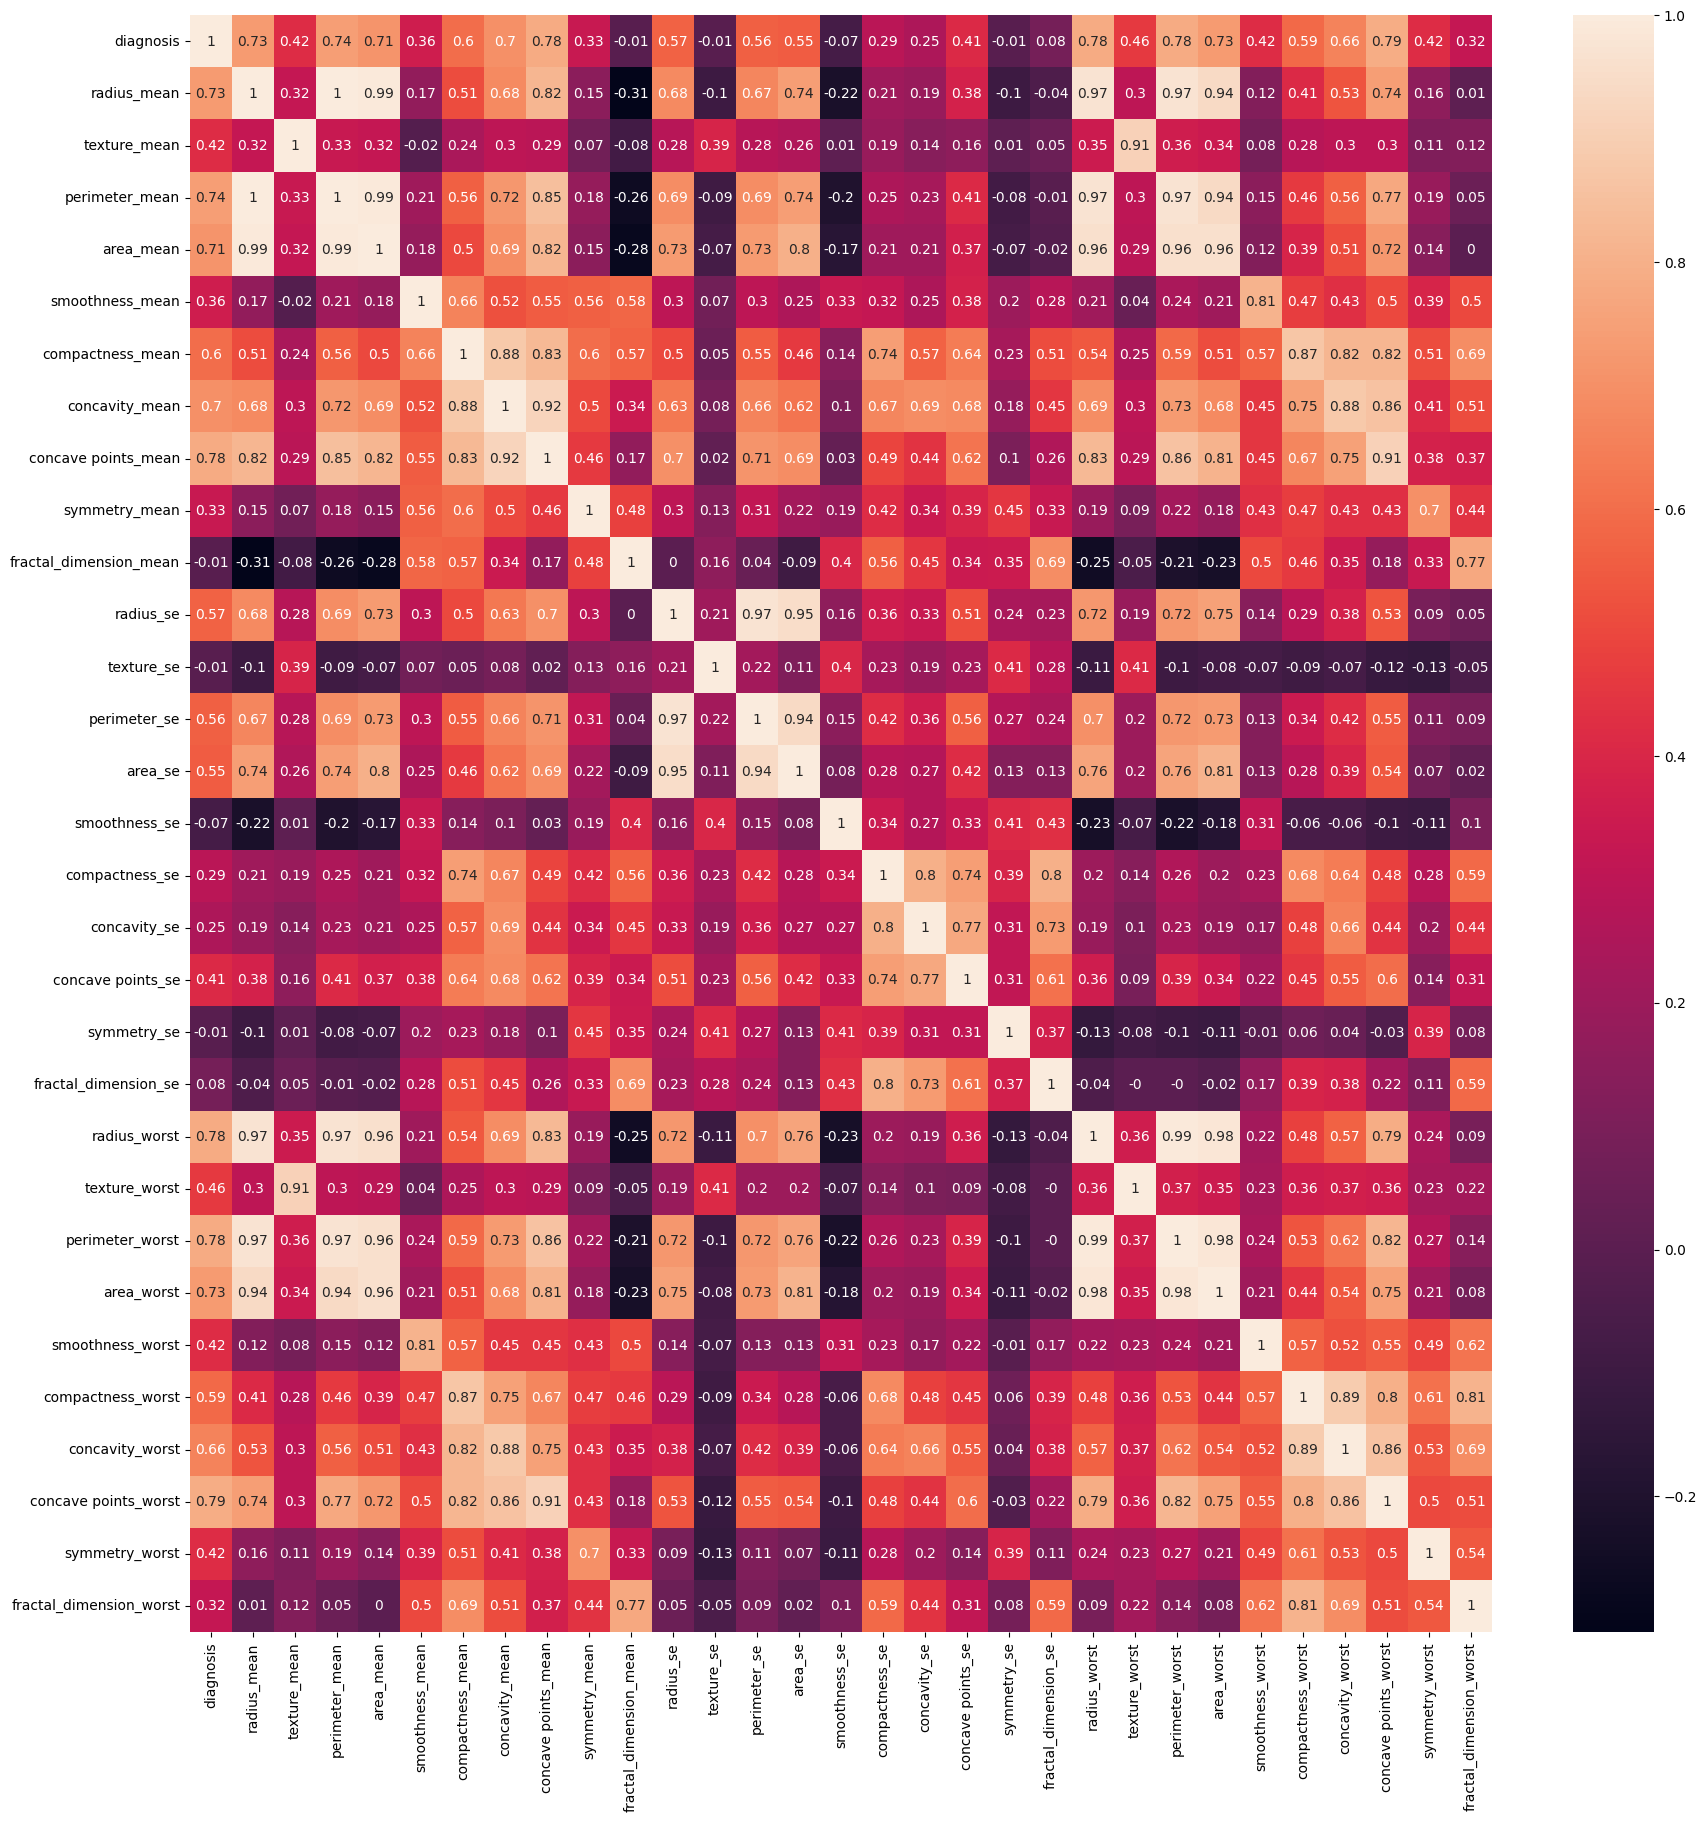

In [ ]:
plt.figure(figsize=(21,21))
sns.heatmap(correlation,annot=True)

- study of heat map in more clear way

- scatter plot the mean columns of data to see the strong correlation which lead to multicollinearity

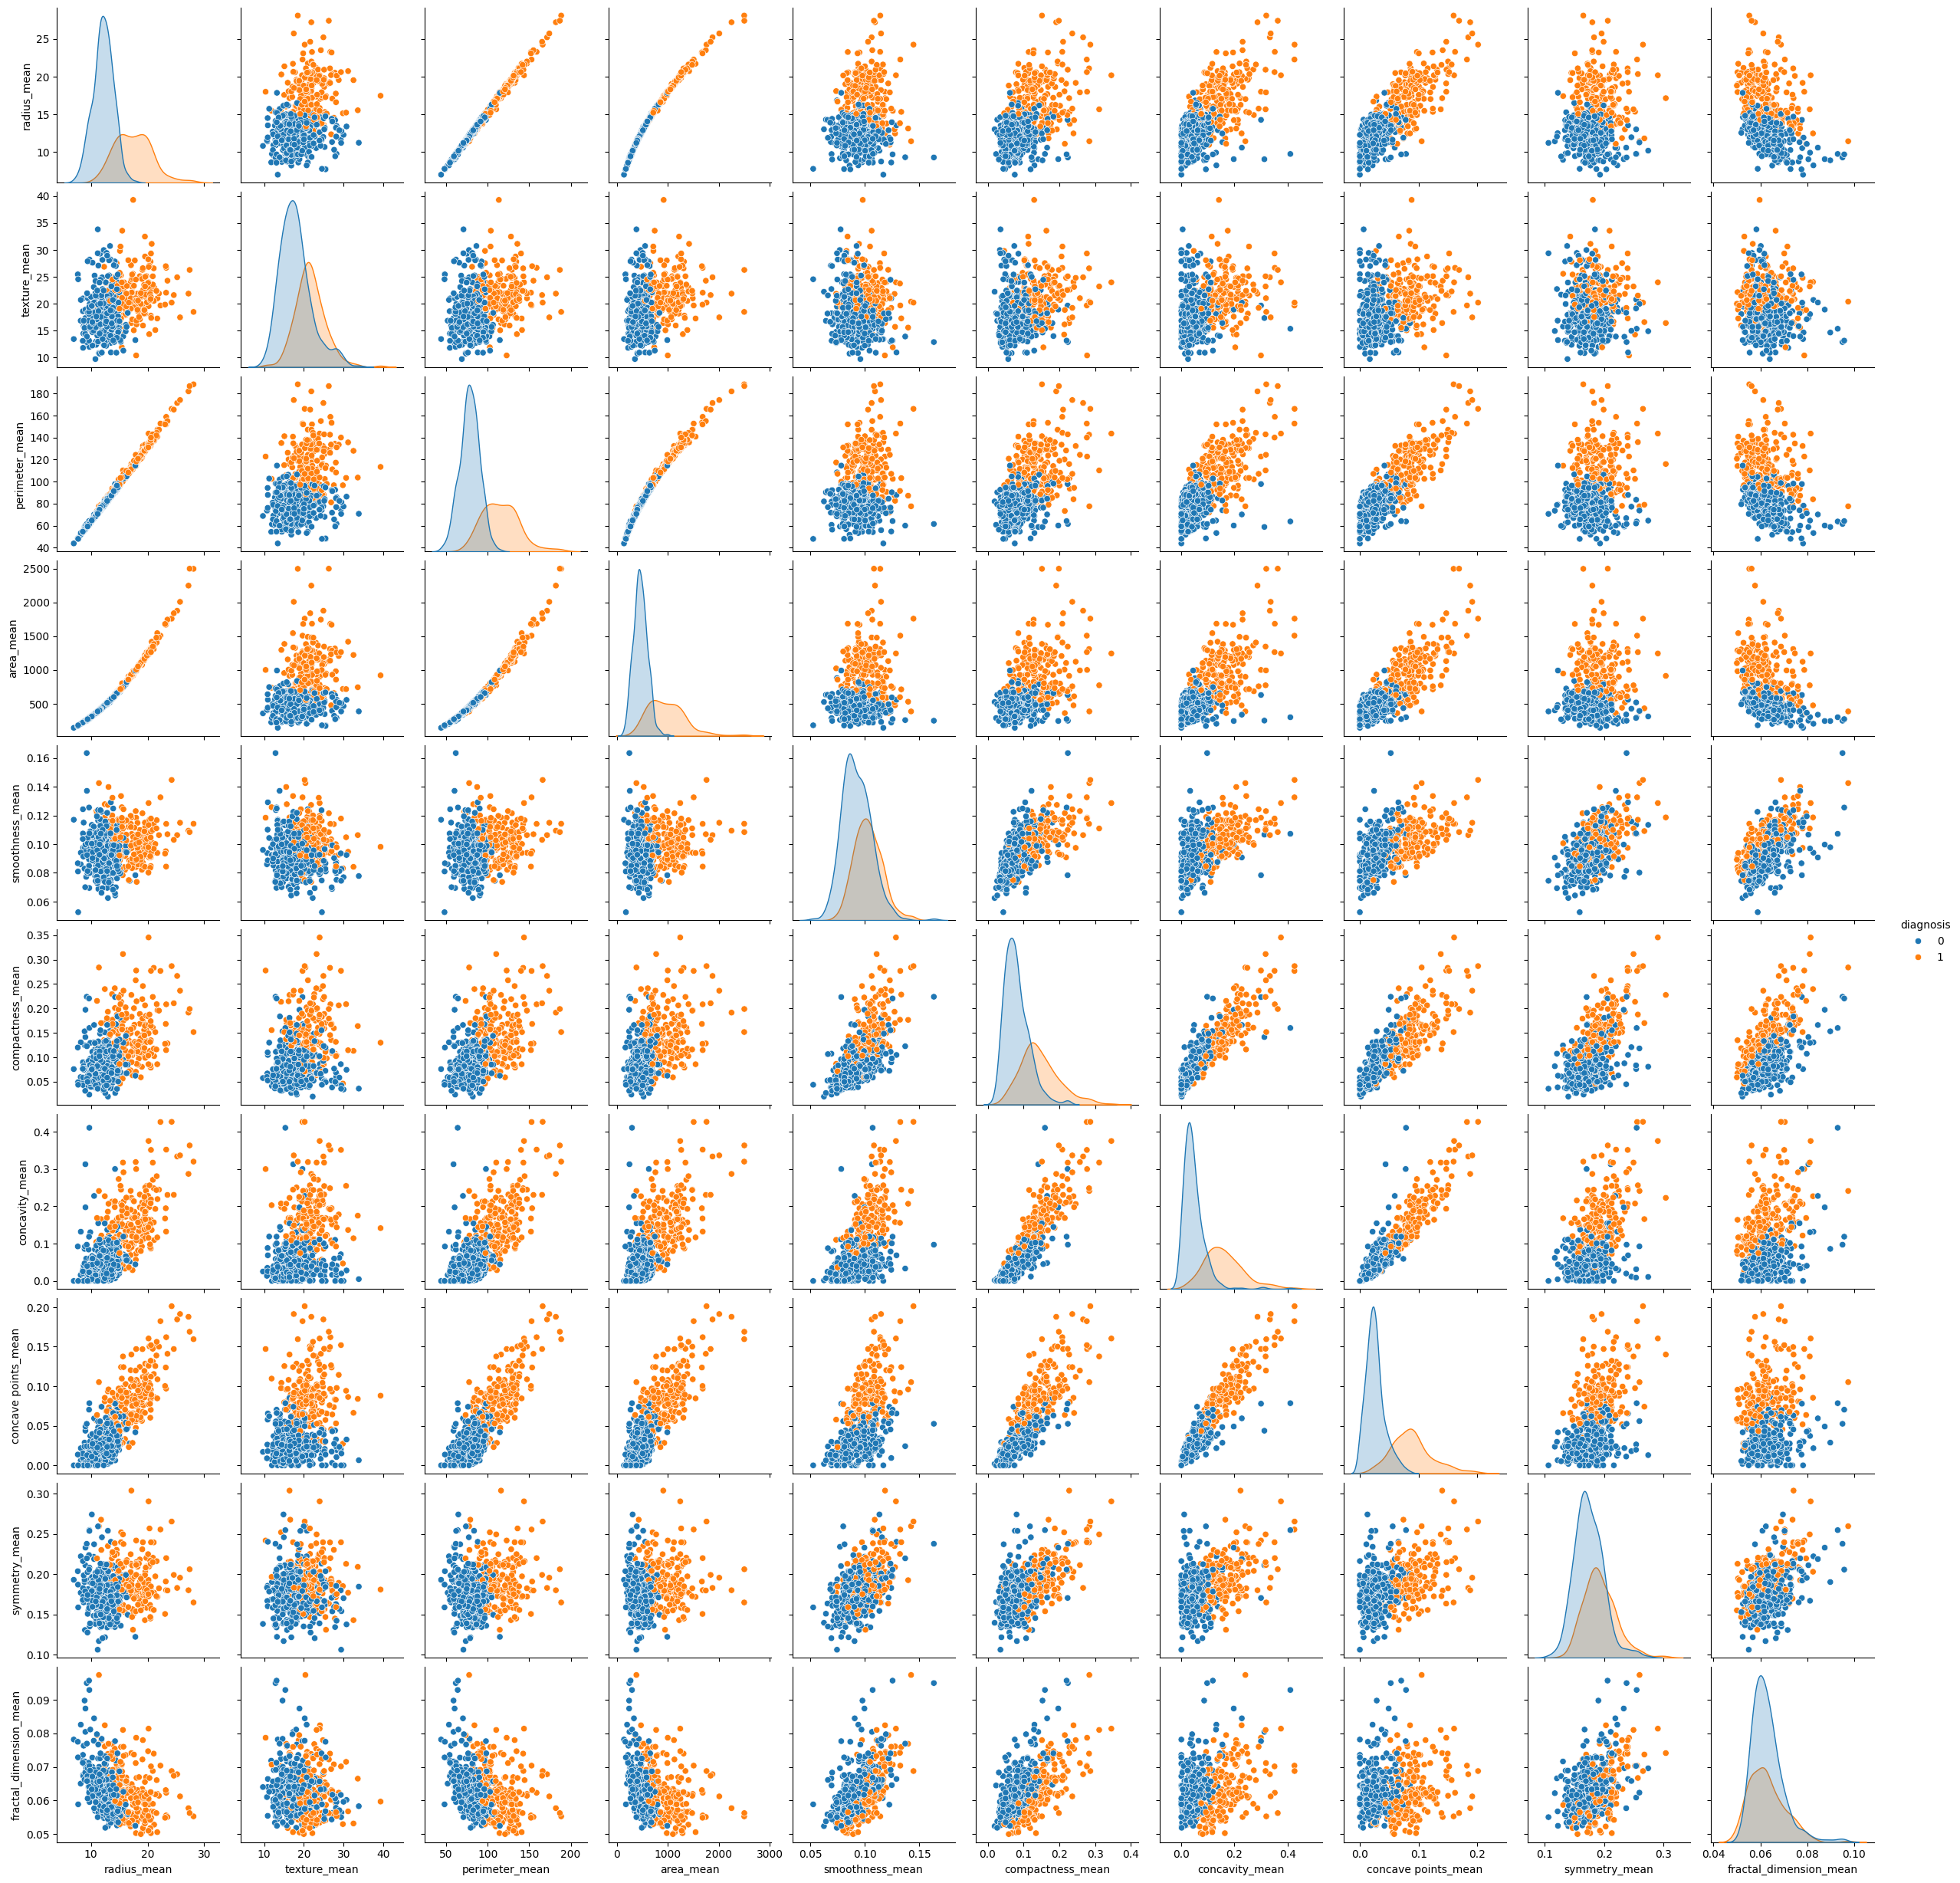

In [ ]:
sns.pairplot(data=breast_cancer_df[['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',]],hue='diagnosis')

- From this scatter plot we ensure raduis mean - perimeter mean - area mean cause  multicollinearity

- also found high correlation between concavity mean and concave_points_mean

<Axes: >

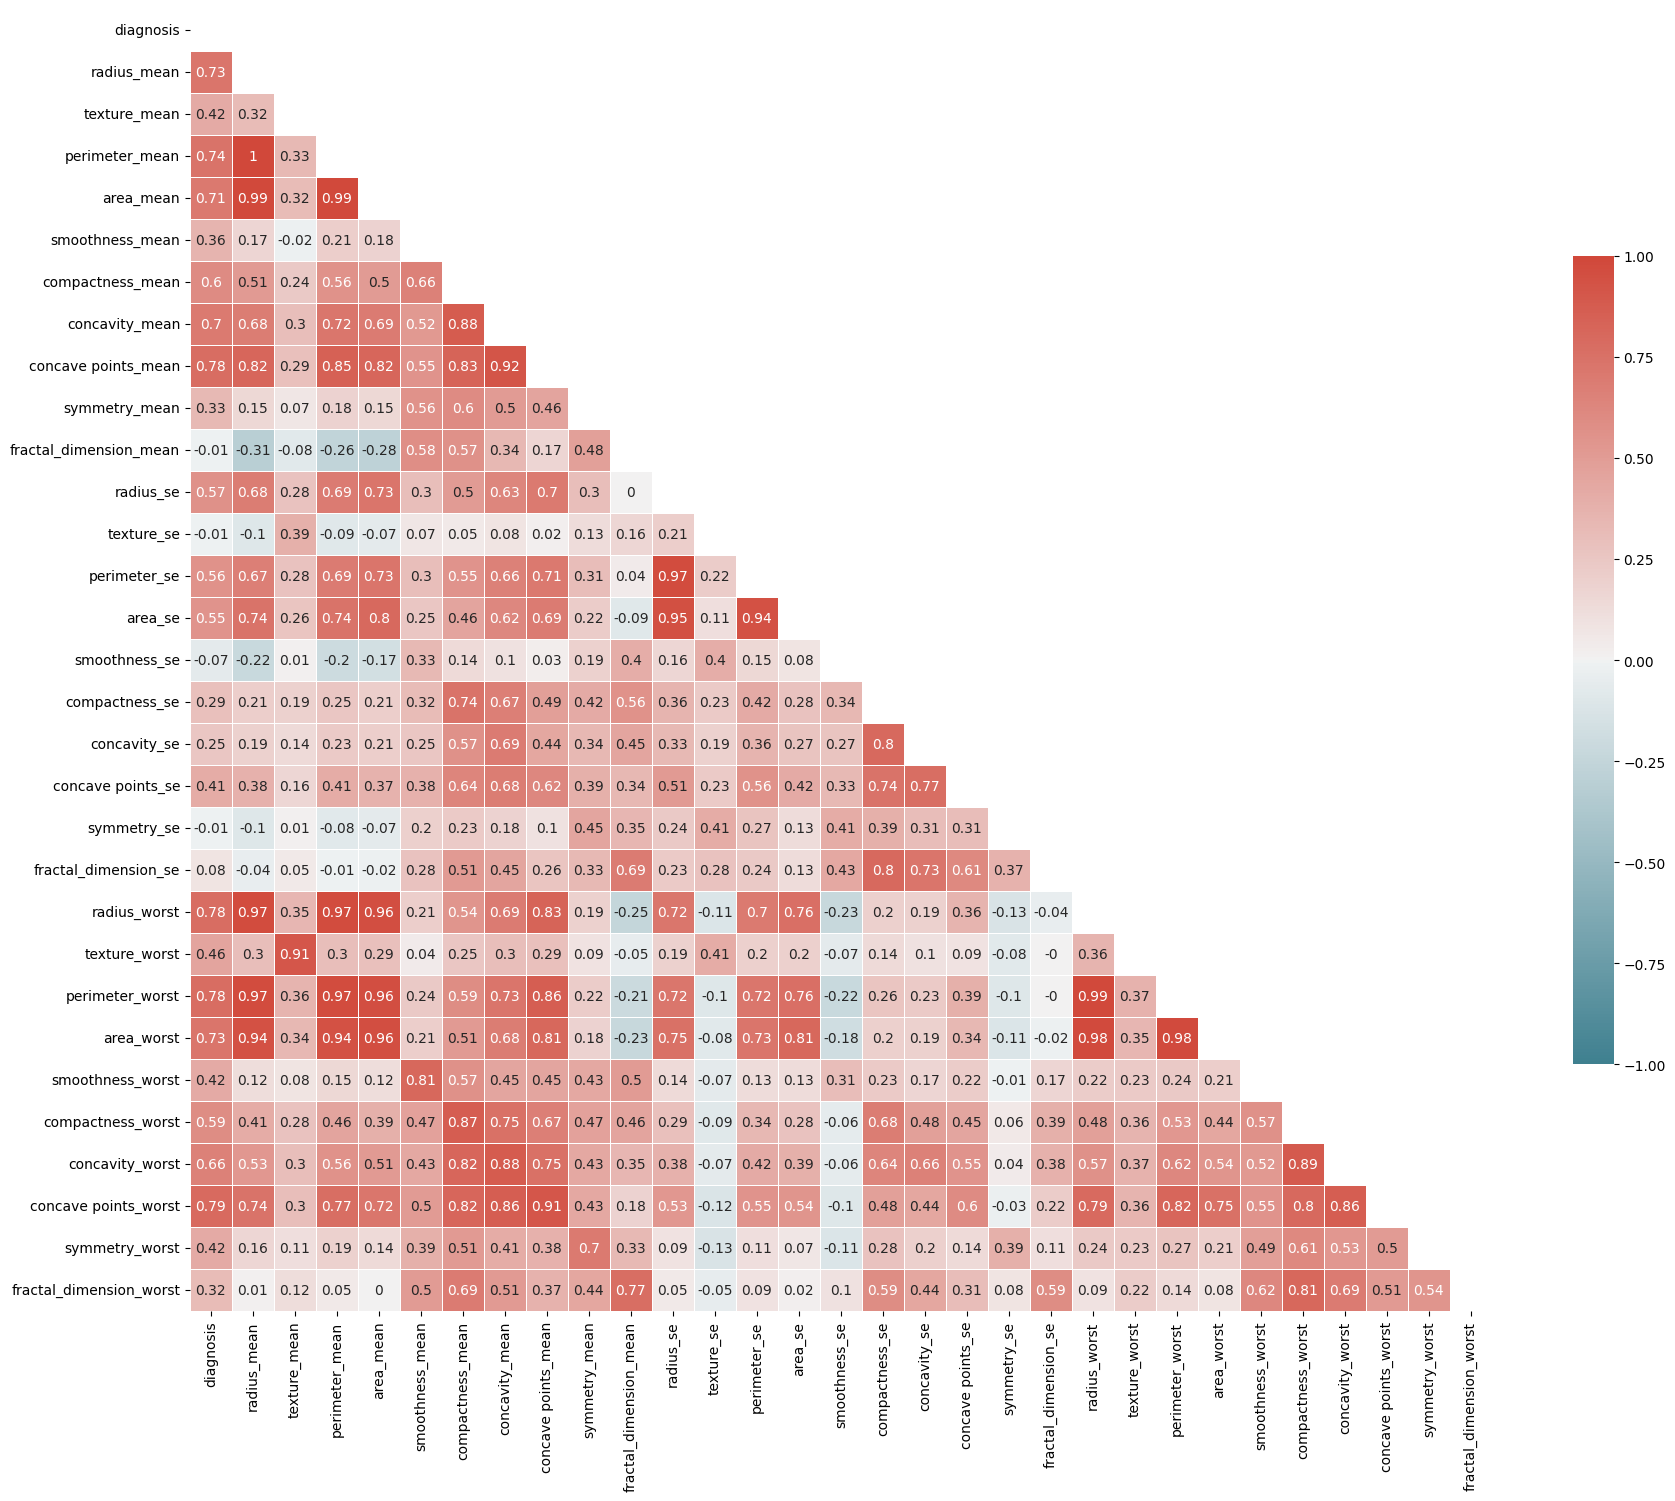

In [ ]:
# do not show the upper triangle
# make the same shape of heat map with true value
bool_heat_map = np.zeros_like(correlation, dtype=np.bool)
bool_heat_map[np.triu_indices_from(bool_heat_map)] = True
#change color map
color_map = sns.diverging_palette(215, 15, as_cmap=True)
plt.figure(figsize=(21,21))
sns.heatmap(correlation, mask=bool_heat_map, cmap=color_map, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [ ]:
breast_cancer_df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
drop_cols=[
    'area_mean',
    'perimeter_mean',
    'concavity_mean',
    'concave points_mean',
    'perimeter_se',
    'area_se',
    'concavity_se',
    'concave points_se',
    'radius_worst',
    'texture_worst',
    'perimeter_worst',
    'area_worst',
    'smoothness_worst',
    'compactness_worst',
    'concavity_worst',
    'concave points_worst',
    'symmetry_worst',
    'fractal_dimension_worst'
    ]

breast_cancer_df=breast_cancer_df.drop(columns=drop_cols)
breast_cancer_df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

<Axes: >

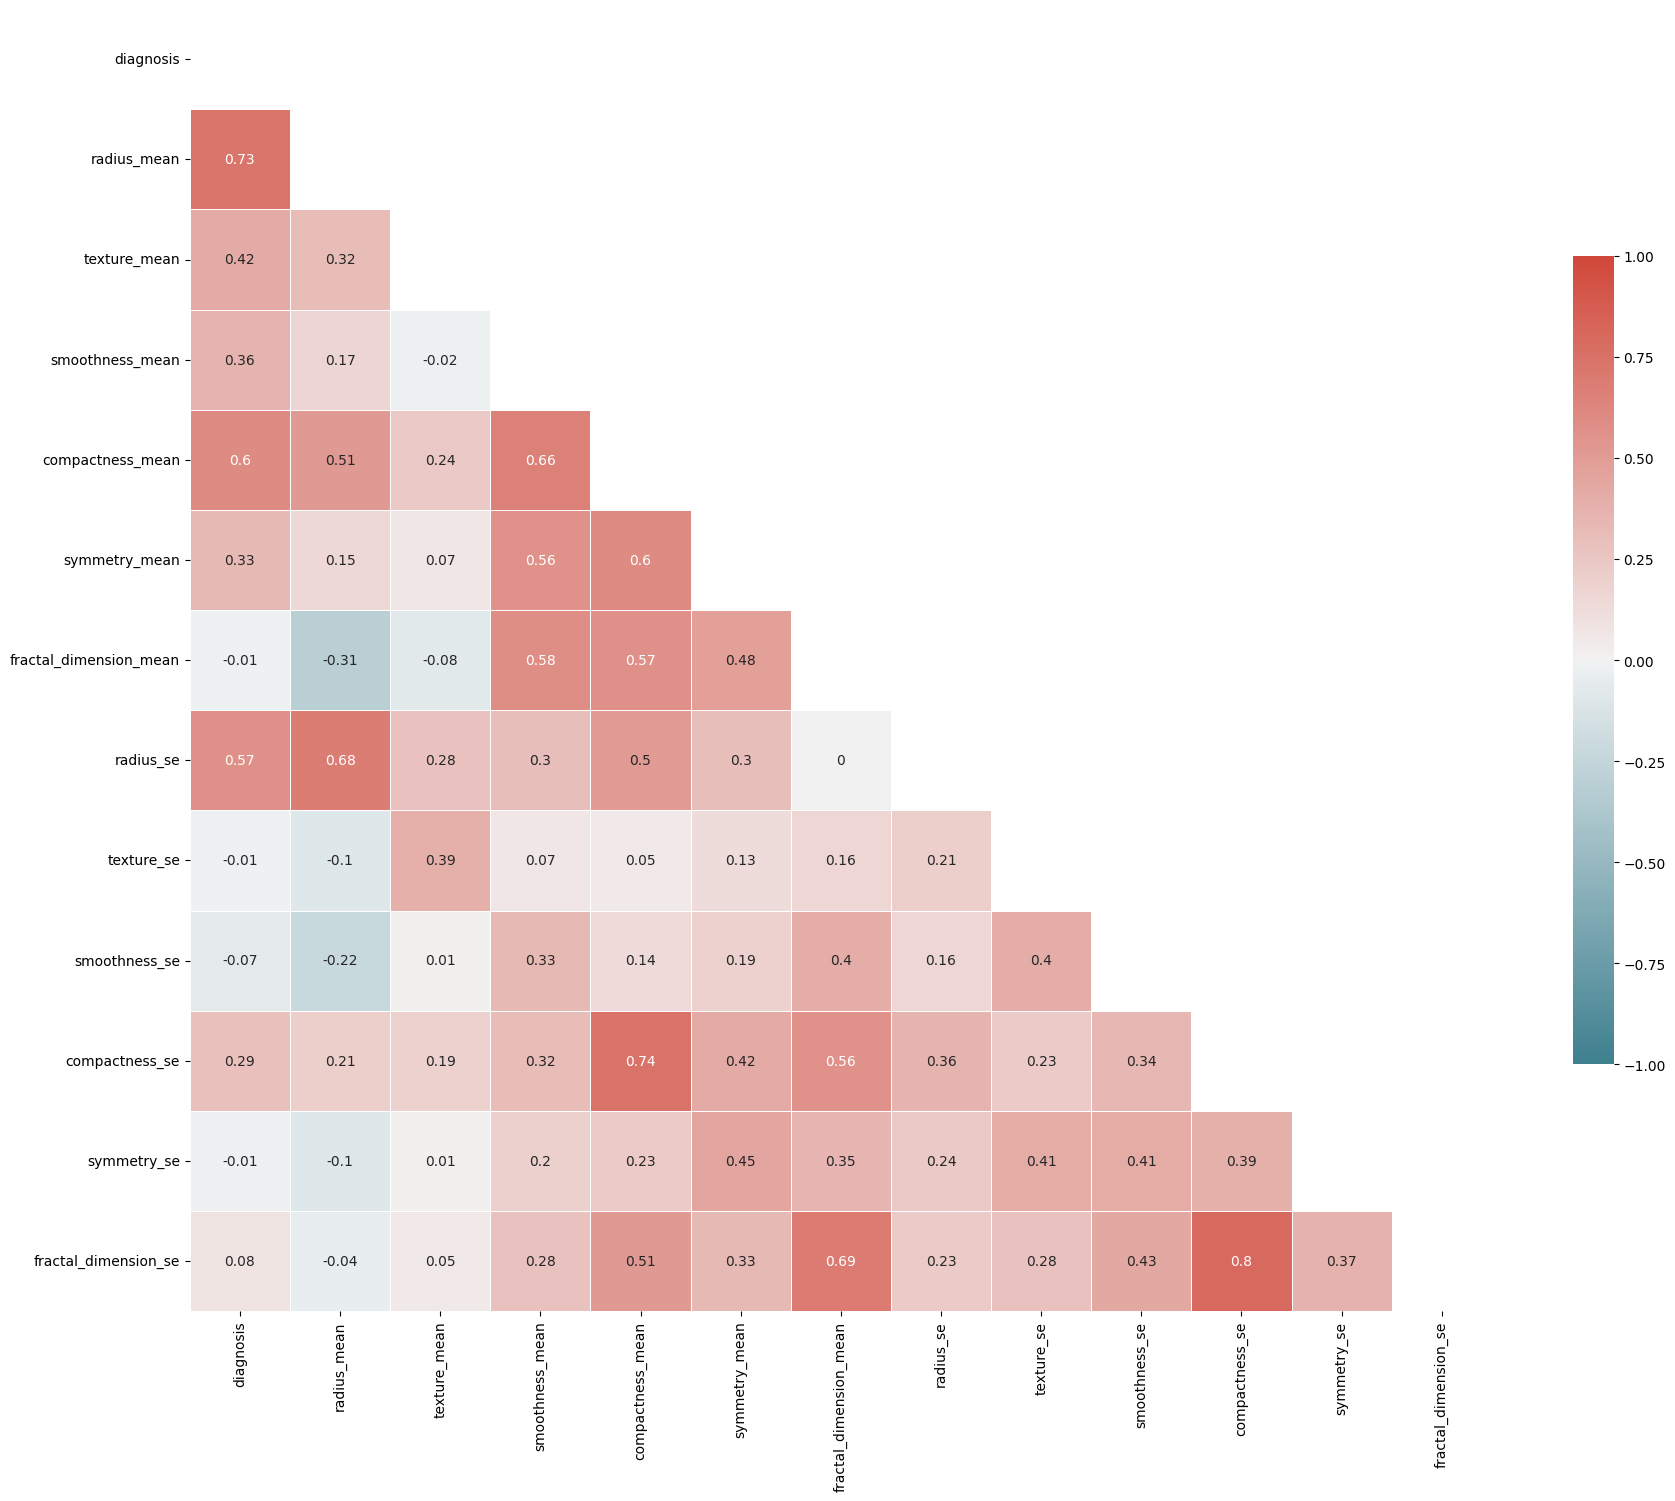

In [ ]:
# do not show the upper triangle
# make the same shape of heat map with true value
correlation=breast_cancer_df.corr().round(2)
bool_heat_map = np.zeros_like(correlation, dtype=np.bool)
bool_heat_map[np.triu_indices_from(bool_heat_map)] = True
#change color map
color_map = sns.diverging_palette(215, 15, as_cmap=True)
plt.figure(figsize=(21,21))
sns.heatmap(correlation, mask=bool_heat_map, cmap=color_map, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [ ]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    int64  
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   smoothness_mean         569 non-null    float64
 4   compactness_mean        569 non-null    float64
 5   symmetry_mean           569 non-null    float64
 6   fractal_dimension_mean  569 non-null    float64
 7   radius_se               569 non-null    float64
 8   texture_se              569 non-null    float64
 9   smoothness_se           569 non-null    float64
 10  compactness_se          569 non-null    float64
 11  symmetry_se             569 non-null    float64
 12  fractal_dimension_se    569 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 57.9 KB


#Building Model

- import sklearn library to divide data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

- sperate target and features from each other

In [ ]:
X=breast_cancer_df.drop(['diagnosis'],axis=1) #axis 1 to drop it from column not a row
y = breast_cancer_df['diagnosis']

- split data into train data and test dat : 70% train and 30% test

In [ ]:
# random state to get fixed number of data split and fixed columns each run
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)

- **Fearure Scaling** -> it used to make all columns in the same scale mean=0 , sd=1 , model may be focus on features that have a bigger values but other features are also important so feature scaling but all features in the same scale

- import libraries for feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#get scaler object
ss=StandardScaler()
# scaling x_train and x_test
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

#Models and finding out the Best one

- Logistic Regression

- import library to logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

- buliding the model

In [ ]:
lr=LogisticRegression() # get object
model1=lr.fit(X_train,y_train) # train model
prediction1=model1.predict(X_test) # test model

- see confusion matrix

In [ ]:
cm=confusion_matrix(y_test,prediction1)
cm
#TP FN
#FP TN

array([[110,   5],
       [  2,  54]])

- calculate accuracy

In [ ]:
accuracy=accuracy_score(y_test,prediction1) #(TP+TN)/(TP+FN+FP+TN)
accuracy

0.9590643274853801

- decision tree

- import necessary library for decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

- bulid decision tree model

In [ ]:
dtc=DecisionTreeClassifier()
model2=dtc.fit(X_train,y_train)
prediction2=model2.predict(X_test)

- see confusion matrix

In [ ]:
cm2= confusion_matrix(y_test,prediction2)
cm2

array([[106,   9],
       [  7,  49]])

calculate accuracy

In [ ]:
accuracy_score(y_test,prediction2)

0.9064327485380117

- Random Forest

- import necessary library for random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier()
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)

see confusion matrix

In [ ]:
cm3=confusion_matrix(y_test, prediction3)
cm3

array([[110,   5],
       [  7,  49]])

calculate accuracy

In [ ]:
accuracy_score(y_test, prediction3)

0.9298245614035088

- create report for last three models (logistic regression - decision tree - random forest)

- import report module

In [ ]:
from sklearn.metrics import classification_report

- report

In [ ]:
print("LOGISTIG REGRESSION")
print(classification_report(y_test, prediction1))
print('='*50)
print("DESCISION TREE")
print(classification_report(y_test, prediction2))
print('='*50)
print("RANDOM FOREST")
print(classification_report(y_test, prediction3))
print('='*50)

LOGISTIG REGRESSION
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       115
           1       0.92      0.96      0.94        56

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.96      0.96      0.96       171

DESCISION TREE
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       115
           1       0.84      0.88      0.86        56

    accuracy                           0.91       171
   macro avg       0.89      0.90      0.89       171
weighted avg       0.91      0.91      0.91       171

RANDOM FOREST
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       115
           1       0.91      0.88      0.89        56

    accuracy                           0.93       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.93  

K Nearest Neighbor (K NN)

Support Vector Machine

Naive Bayes

- import necessary library for these three models

In [ ]:
#models modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# accuracy test
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

- test each model to know which onw to work with

In [ ]:
models=[]

models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

- evaluate each model

In [ ]:
results =[]
names=[]
for name , model in models:
    kfold=KFold(n_splits=10, shuffle=True,random_state=40)
    cv_results= cross_val_score(model, X_train, y_train, cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)

    msg = f"{name}: {cv_results.mean():.4f} (±{cv_results.std():.4f})"
    print(msg)


KNN: 0.9020 (±0.0441)
NB: 0.8997 (±0.0641)
SVM: 0.9096 (±0.0452)


- working on SVM

In [ ]:
SVM = SVC()
SVM.fit(X_train, y_train)
predictions= SVM.predict(X_test)

- see accuracy , confusion matrix and report

In [ ]:
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


0.9649122807017544
[[112   3]
 [  3  53]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       115
           1       0.95      0.95      0.95        56

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



- print report for logestic regression and SVM

In [ ]:
print("LOGISTIG REGRESSION")
print(accuracy_score(y_test, prediction1))
print(classification_report(y_test, prediction1))
print('='*50)
print("SVM")
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

LOGISTIG REGRESSION
0.9590643274853801
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       115
           1       0.92      0.96      0.94        56

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.96      0.96      0.96       171

SVM
0.9649122807017544
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       115
           1       0.95      0.95      0.95        56

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

